# 처음부터 실행하지 말고 의사록 어조 라벨링부터 실행!

In [1]:
#의사록 불러오기

In [2]:
import pandas as pd
import re

In [3]:
mpb = pd.read_csv('mpb_final.csv')

In [4]:
mpb

,Unnamed: 0,date,body,ngram
0,0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG,플래트닝/NNG,기..."
1,1,2017-10-19,일부 위원은 최근 미국에서는 임금상승세가 확대되고 세제개혁에 대한 기대 감이 커지...,"임금/NNG;상승/NNG;확대/NNG,기대/NNG;크/VV,대차대조표/NNG;축소/..."
2,2,2017-08-31,일부 위원은 미국의 금리 정상화 행보에도 불구하고 미 달러화가 약세기조를 지속하면...,"국제/NNG;원자재/NNG;가격/NNG;상승/NNG,금리/NNG;하락/NNG;압력/..."
3,3,2017-07-13,일부 위원은 주요국에서는 성장과 고용이 회복국면의 정점을 향해 가고 있음.에도 불구...,"성장/NNG,하회/NNG,국제/NNG;금융시장/NNG;변동성/NNG;확대/NNG,f..."
4,4,2017-05-25,일부 위원은 최근 국제금융시장이 안정된 모습을 지속하는 가운데 국내금융 시장도 외...,"외국인/NNG;증권/NNG;투자자금/NNG;유입/NNG;확대/NNG,국제/NNG;금..."
...,...,...,...,...
118,118,2005-10-11,일부 위원은 미국과 우리나라의 정책금 리 격차가 확대되고 있는 가운데 금년 두 차...,"fed/NNG;금리/NNG;인상/NNG,단기/NNG;금리갭/NNG;확대/NNG,국채..."
119,119,2005-09-08,일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 인...,"경상/NNG;수지/NNG;흑자/NNG,투자/NNG;매우/MAG;부진/NNG,전망/N..."
120,120,2005-08-11,일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸다...,"절상/NNG;원화/NNG;절상/NNG,절상/NNG;위안/NNG;절상/NNG,원화/N..."
121,121,2005-07-07,일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,"원화/NNG;절하/NNG;압력/NNG,가격/NNG;약세/NNG,원화/NNG;약세/N..."


In [5]:
# 의사록 문장별 토큰화

In [6]:
temp = mpb['body']
date = mpb['date']
split = []

new = {}

for idx, body in enumerate(temp):
    splited_s = temp[idx].split('.')
    for j in splited_s:
        split.append([date[idx], j])

In [7]:
df = pd.DataFrame(split)
df.columns = ['date', 'body']

In [8]:
import pandas as pd
from tqdm import tqdm
from ekonlpy.sentiment import MPCK
mpck = MPCK()
# 기사 문장별 split 후 ngramize
ngram_list=[]
for i in tqdm(range(len(df['body']))):
    try:
        sent_ngram=[]
        sent=df['body'][i].split('.')
        for s in sent:
            ngrams = mpck.ngramize(mpck.tokenize(s),keep_overlapping_ngram=False)
            if ngrams:
                sent_ngram.append(ngrams)
        ngram_list.append(sent_ngram)
    except:
        print(i)
df['ngram']=ngram_list

100%|█████████████████████████████████████████████████████████████████████████████| 8258/8258 [00:17<00:00, 480.15it/s]


In [9]:
tem = df['ngram']

In [10]:
tem = [re.sub('[\[\]\']', "", str(i)) for i in tem]
tem = [re.sub(' ', '', i) for i in tem]
df['ngram'] = tem
df

,date,body,ngram
0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG"
1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG
2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG
3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물..."
4,2017-11-30,이에 동 위원은 미국의 세제개편안이 의회를 통과한다면 수익률곡선이나 정 책금리 경...,
...,...,...,...
8253,2005-06-09,20일 현재 전월(1,
8254,2005-06-09,9%)과 비슷한 2,
8255,2005-06-09,0%를 유지하 음,
8256,2005-06-09,4월말 전업카드사 연체율은 전월과 비슷한 수준을 유지하 으나 대환대출 포함 연체율...,연체율/NNG;하락/NNG


In [11]:
idx_del = df[df['ngram'] == ''].index
idx_del

Int64Index([   4,    9,   10,   21,   22,   23,   24,   25,   29,   32,
            ...
            8246, 8247, 8248, 8250, 8251, 8252, 8253, 8254, 8255, 8257],
           dtype='int64', length=3932)

In [12]:
df = df.drop(idx_del)

In [13]:
df.to_csv('mpb_split.csv')

In [14]:
df

,date,body,ngram
0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG"
1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG
2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG
3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물..."
5,2017-11-30,비록 일부 선반영된 측면도 있겠지만 미 의회에서 세제개편안을 가결한다면 재정적자 ...,재정/NNG;적자/NNG
...,...,...,...
8242,2005-06-09,기업자금 5월중 은행의 기업대출은 견조한 증가세를 지속하 음,대출/NNG;견조/NNG;증가/NNG
8243,2005-06-09,중소기업의 경 우 일부 은행의 적극적인 대출확대에 따라 전월에 이어 비교적 큰 폭...,"은행/NNG;적극적/VAX;대출/NNG;확대/NNG,대출/NNG;증가/NNG;축소/NNG"
8244,2005-06-09,기업자금사정은 어음부도율이 낮은 수준을 유지하는 등 대체로 무난하 으나 개인사업자...,"중소기업/NNG;대출/NNG;연체율/NNG;상승/NNG,자금사정/NNG;악화/NNG..."
8249,2005-06-09,"주택담보대출의 경우 재건축 단지에 대한 집단대출 취급, 대출확대 경 쟁 등으로 전...",대출/NNG;확대/NNG


In [15]:
#mpb['date'] =pd.to_datetime(mpb.date)
#mpb.to_pickle('mpb_final.pkl')

In [16]:
# 사전 불러오기

In [17]:
dicts = pd.read_csv('FINAL_DICT.csv')
dicts

,ngram,비둘기파,매파,비둘기파prob,매파prob,polarityscore,label
0,콜/NNG;금리/NNG;인상/NNG,1479,1248,0.000959,2.468787e-03,2.574063,1
1,인플레이션/NNG;우려/NNG,1628,742,0.001056,1.468221e-03,1.390767,1
2,fed/NNG;금리/NNG;인하/NNG,1280,632,0.000830,1.250707e-03,1.506699,1
3,통화/NNG;완화/NNG,2261,538,0.001466,1.064831e-03,0.726331,-1
4,fed/NNG;금리/NNG;오르/VV,1675,421,0.001086,8.334750e-04,0.767359,-1
...,...,...,...,...,...,...,...
43574,gdp/NNG;전망/NNG;하회/NNG,7,0,0.000005,9.887011e-07,0.203355,-1
43575,기대/NNG;채권/NNG;금리/NNG;하향/NNG;안정/NNG,4,0,0.000003,9.887011e-07,0.338925,-1
43576,흑자/NNG;급감/NNG,4,0,0.000003,9.887011e-07,0.338925,-1
43577,금리/NNG;하락/NNG;아니/VCN,6,0,0.000004,9.887011e-07,0.234640,-1


In [18]:
# 의사록 어조 라벨링

In [19]:
import pandas as pd
from collections import defaultdict

n_t_merge = pd.read_csv('mpb_split.csv')
dicts = pd.read_csv('FINAL_DICT.csv')

# 열 생성
n_t_merge['매파count'] = ""
n_t_merge['비둘기파count'] = ""

# 초기값
a_cnt = 0
b_cnt = 0

# 사전 dictionary로 형식변경
dic = defaultdict(lambda: 0)

for i, row in dicts.iterrows() :
    dic[row["ngram"]] = row["label"]


for i in range(len(n_t_merge)):
    n_t_dic = str(n_t_merge['ngram'][i]).split(',')

    for j in range(len(n_t_dic)):
        n_t = n_t_dic[j]
        
        if dic[n_t] == 1:
            a_cnt = a_cnt + 1
        elif dic[n_t] == -1:
            b_cnt = b_cnt + 1
        else:
            continue
            
    n_t_merge['매파count'][i] = a_cnt
    n_t_merge['비둘기파count'][i] = b_cnt
    a_cnt = 0
    b_cnt = 0

n_t_merge

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,date,body,ngram,매파count,비둘기파count
0,0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG",0,0
1,1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG,0,0
2,2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG,0,1
3,3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물...",1,0
4,5,2017-11-30,비록 일부 선반영된 측면도 있겠지만 미 의회에서 세제개편안을 가결한다면 재정적자 ...,재정/NNG;적자/NNG,0,0
...,...,...,...,...,...,...
4321,8242,2005-06-09,기업자금 5월중 은행의 기업대출은 견조한 증가세를 지속하 음,대출/NNG;견조/NNG;증가/NNG,1,0
4322,8243,2005-06-09,중소기업의 경 우 일부 은행의 적극적인 대출확대에 따라 전월에 이어 비교적 큰 폭...,"은행/NNG;적극적/VAX;대출/NNG;확대/NNG,대출/NNG;증가/NNG;축소/NNG",0,2
4323,8244,2005-06-09,기업자금사정은 어음부도율이 낮은 수준을 유지하는 등 대체로 무난하 으나 개인사업자...,"중소기업/NNG;대출/NNG;연체율/NNG;상승/NNG,자금사정/NNG;악화/NNG...",0,1
4324,8249,2005-06-09,"주택담보대출의 경우 재건축 단지에 대한 집단대출 취급, 대출확대 경 쟁 등으로 전...",대출/NNG;확대/NNG,0,0


In [20]:
#n_t_merge.to_csv('의사록_매비count.csv', index = False)

In [21]:
n_t_merge

,Unnamed: 0,date,body,ngram,매파count,비둘기파count
0,0,2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"fed/NNG;금리/NNG;인상/NNG,견조/NNG;회복/NNG",0,0
1,1,2017-11-30,일각에서는 미국의 장기실 질균형금리 및 기대인플레이션의 하락을 그 원인으로 거론하...,기대/NNG;인플레이션/NNG;하락/NNG,0,0
2,2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG,0,1
3,3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물...",1,0
4,5,2017-11-30,비록 일부 선반영된 측면도 있겠지만 미 의회에서 세제개편안을 가결한다면 재정적자 ...,재정/NNG;적자/NNG,0,0
...,...,...,...,...,...,...
4321,8242,2005-06-09,기업자금 5월중 은행의 기업대출은 견조한 증가세를 지속하 음,대출/NNG;견조/NNG;증가/NNG,1,0
4322,8243,2005-06-09,중소기업의 경 우 일부 은행의 적극적인 대출확대에 따라 전월에 이어 비교적 큰 폭...,"은행/NNG;적극적/VAX;대출/NNG;확대/NNG,대출/NNG;증가/NNG;축소/NNG",0,2
4323,8244,2005-06-09,기업자금사정은 어음부도율이 낮은 수준을 유지하는 등 대체로 무난하 으나 개인사업자...,"중소기업/NNG;대출/NNG;연체율/NNG;상승/NNG,자금사정/NNG;악화/NNG...",0,1
4324,8249,2005-06-09,"주택담보대출의 경우 재건축 단지에 대한 집단대출 취급, 대출확대 경 쟁 등으로 전...",대출/NNG;확대/NNG,0,0


In [22]:
#의사록 문장 어조 라벨링

#n_t_merge = pd.read_csv('의사록_매비count.csv')
n_t_merge['tone_s']=''


for i in range(len(n_t_merge)):
    key1 = n_t_merge['매파count'][i]
    key2 = n_t_merge['비둘기파count'][i]
    
    if key1 != key2:
        
        subs = key1 - key2
        sums = key1 + key2

        n_t_merge['tone_s'][i] = subs / sums
        
    else:
        n_t_merge['tone_s'][i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [23]:
n_t_merge.sort_values(by='date')

,Unnamed: 0,date,body,ngram,매파count,비둘기파count,tone_s
4325,8256,2005-06-09,4월말 전업카드사 연체율은 전월과 비슷한 수준을 유지하 으나 대환대출 포함 연체율...,연체율/NNG;하락/NNG,1,0,1
4255,8030,2005-06-09,"시중자금의 단기부동화 및 과잉유동성의 투기자금화 조짐, 이 에 따른 부동산가격 불...","금융시장/NNG;불확실성/NNG;증대/NNG,부동산/NNG;가격/NNG;불안/NNG",2,0,1
4256,8032,2005-06-09,실물경제 면에서는 수출증가세가 둔화되고 민간소비도 아직 미약한 회복 에 그치고 있...,"수출/NNG;증가/NNG;둔화/NNG,설비/NNG;투자/NNG;부진/NNG,예상/N...",0,3,-1
4257,8033,2005-06-09,물가 면에서는 근원 인플레이션율이 목표범위의 하한에 도달해 있으며 소비자물가상승률...,"소비자/NNG;물가/NNG;상승률/NNG;안정/NNG,물가/NNG;안정/NNG",0,1,-1
4258,8034,2005-06-09,"다만, 저 금리 하에 시중자금이 생산부문보다는 토지 및 주택시장으로 집중되면서 가...","부동산/NNG;가격/NNG;거품/NNG,가격/NNG;불안/NNG",1,0,1
...,...,...,...,...,...,...,...
21,30,2017-11-30,다른 일부 위원은 LCR(Liquidity Coverage Ratio) 산정에 유리...,"시장성/NNG;수신/NNG;증가/NNG,시장성/NNG;수신/NNG;늘/VV",0,2,-1
22,31,2017-11-30,다만 앞으로 이들 자금이 또 다시 시장성 수신을 통해 차환(roll over)될 ...,단기/NNG;금리/NNG;변동성/NNG;확대/NNG,0,0,0
23,33,2017-11-30,또 다른 일부 위원은 글로벌 주식시장의 과열을 우려하는 견해가 제기되고 - 1...,"기업/NNG;실적/NNG;개선/NNG,업황/NNG;부정적/VAX,변동성/NNG;축소...",2,0,1
12,15,2017-11-30,아울러 고정금리대출 중에서 혼합 형금리대출이 상당한 비중을 차지하고 있는 것으로 ...,"부채/NNG;상환/NNG;위험/NNG,금리/NNG;상승/NNG,위험/NNG;높/VA",0,1,-1


In [24]:
#문장어조를 기준으로 매파/비둘기파 라벨링
n_t_merge = n_t_merge.loc[n_t_merge['tone_s'] != 0]
n_t_merge['label'] = 0
n_t_merge['label'] = [1 if x>0 else -1 for x in n_t_merge['tone_s']]

n_t_merge.to_csv("total_label_matching_tone_s_label.csv", index = False)
n_t_merge

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,date,body,ngram,매파count,비둘기파count,tone_s,label
2,2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG,0,1,-1,-1
3,3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물...",1,0,1,1
8,11,2017-11-30,이에 동 위원은 금년 3/4분기 부동산임대업대출이 큰 폭으로 늘어났다고 지적 하면...,"대출/NNG;도크/NNG;늘/VV,주택담보대출/NNG;증가/NNG",1,0,1,1
9,12,2017-11-30,"아울러 동 위원은 일각에서는 은행이 대출 증가속도 관리, 수익성 확보 등을 위해 ...","대출/NNG;스프레드/NNG;인상/NNG,대출/NNG;스프레드/NNG;상승/NNG,...",3,0,1,1
11,14,2017-11-30,이어서 동 위원은 주택담보대출과 관련하여 고LTV·고DTI 대출 비중이 낮아지 고...,"금리/NNG;상승/NNG;취약/NNG,낮/VA;금리/NNG;상승/NNG,장단기스프레...",3,0,1,1
...,...,...,...,...,...,...,...,...
4319,8239,2005-06-09,자금흐름 5월중 은행 수신은 일부 은행의 주택담보대출과 연계한 CD 발행 확대로...,cd/NNG;발행/NNG;확대/NNG,1,0,1,1
4321,8242,2005-06-09,기업자금 5월중 은행의 기업대출은 견조한 증가세를 지속하 음,대출/NNG;견조/NNG;증가/NNG,1,0,1,1
4322,8243,2005-06-09,중소기업의 경 우 일부 은행의 적극적인 대출확대에 따라 전월에 이어 비교적 큰 폭...,"은행/NNG;적극적/VAX;대출/NNG;확대/NNG,대출/NNG;증가/NNG;축소/NNG",0,2,-1,-1
4323,8244,2005-06-09,기업자금사정은 어음부도율이 낮은 수준을 유지하는 등 대체로 무난하 으나 개인사업자...,"중소기업/NNG;대출/NNG;연체율/NNG;상승/NNG,자금사정/NNG;악화/NNG...",0,1,-1,-1


In [25]:
tone_s = pd.read_csv("total_label_matching_tone_s_label.csv")
tone_s

,Unnamed: 0,date,body,ngram,매파count,비둘기파count,tone_s,label
0,2,2017-11-30,한편 이러한 현상을 향 후 실물경기의 침체 우려와 글로벌 장기채권 수요의 유입에 ...,실물/NNG;경기/NNG;침체/NNG;우려/NNG,0,1,-1.0,-1
1,3,2017-11-30,이에 대해 관련부서에서는 수익률곡선의 평탄화나 장단기금리차의 역전이 장 기금리의 ...,"단기물/NNG;발행/NNG;확대/NNG,fed/NNG;금리/NNG;인상/NNG,실물...",1,0,1.0,1
2,11,2017-11-30,이에 동 위원은 금년 3/4분기 부동산임대업대출이 큰 폭으로 늘어났다고 지적 하면...,"대출/NNG;도크/NNG;늘/VV,주택담보대출/NNG;증가/NNG",1,0,1.0,1
3,12,2017-11-30,"아울러 동 위원은 일각에서는 은행이 대출 증가속도 관리, 수익성 확보 등을 위해 ...","대출/NNG;스프레드/NNG;인상/NNG,대출/NNG;스프레드/NNG;상승/NNG,...",3,0,1.0,1
4,14,2017-11-30,이어서 동 위원은 주택담보대출과 관련하여 고LTV·고DTI 대출 비중이 낮아지 고...,"금리/NNG;상승/NNG;취약/NNG,낮/VA;금리/NNG;상승/NNG,장단기스프레...",3,0,1.0,1
...,...,...,...,...,...,...,...,...
2390,8239,2005-06-09,자금흐름 5월중 은행 수신은 일부 은행의 주택담보대출과 연계한 CD 발행 확대로...,cd/NNG;발행/NNG;확대/NNG,1,0,1.0,1
2391,8242,2005-06-09,기업자금 5월중 은행의 기업대출은 견조한 증가세를 지속하 음,대출/NNG;견조/NNG;증가/NNG,1,0,1.0,1
2392,8243,2005-06-09,중소기업의 경 우 일부 은행의 적극적인 대출확대에 따라 전월에 이어 비교적 큰 폭...,"은행/NNG;적극적/VAX;대출/NNG;확대/NNG,대출/NNG;증가/NNG;축소/NNG",0,2,-1.0,-1
2393,8244,2005-06-09,기업자금사정은 어음부도율이 낮은 수준을 유지하는 등 대체로 무난하 으나 개인사업자...,"중소기업/NNG;대출/NNG;연체율/NNG;상승/NNG,자금사정/NNG;악화/NNG...",0,1,-1.0,-1


In [26]:
dd = tone_s.groupby(['date', 'label']).count().reset_index()
dd

,date,label,Unnamed: 0,body,ngram,매파count,비둘기파count,tone_s
0,2005-06-09,-1,31,31,31,31,31,31
1,2005-06-09,1,29,29,29,29,29,29
2,2005-07-07,-1,21,21,21,21,21,21
3,2005-07-07,1,39,39,39,39,39,39
4,2005-08-11,-1,27,27,27,27,27,27
...,...,...,...,...,...,...,...,...
230,2017-08-31,1,12,12,12,12,12,12
231,2017-10-19,-1,10,10,10,10,10,10
232,2017-10-19,1,4,4,4,4,4,4
233,2017-11-30,-1,5,5,5,5,5,5


In [27]:
tone_tb = pd.merge(dd[dd.label==1][['date','tone_s']], dd[dd.label==-1][['date','tone_s']], on='date')
tone_tb

,date,tone_s_x,tone_s_y
0,2005-06-09,29,31
1,2005-07-07,39,21
2,2005-08-11,28,27
3,2005-09-08,42,13
4,2005-10-11,47,12
...,...,...,...
107,2017-05-25,2,11
108,2017-07-13,3,4
109,2017-08-31,12,4
110,2017-10-19,4,10


In [28]:
dd[dd.label== 1][['date','tone_s']]

,date,tone_s
1,2005-06-09,29
3,2005-07-07,39
5,2005-08-11,28
7,2005-09-08,42
9,2005-10-11,47
...,...,...
226,2017-05-25,2
228,2017-07-13,3
230,2017-08-31,12
232,2017-10-19,4


In [29]:
dd[dd.label== -1]

,date,label,Unnamed: 0,body,ngram,매파count,비둘기파count,tone_s
0,2005-06-09,-1,31,31,31,31,31,31
2,2005-07-07,-1,21,21,21,21,21,21
4,2005-08-11,-1,27,27,27,27,27,27
6,2005-09-08,-1,13,13,13,13,13,13
8,2005-10-11,-1,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
225,2017-05-25,-1,11,11,11,11,11,11
227,2017-07-13,-1,4,4,4,4,4,4
229,2017-08-31,-1,4,4,4,4,4,4
231,2017-10-19,-1,10,10,10,10,10,10


In [30]:
#문서 매파/비둘기파 라벨링

tone_s = pd.read_csv("total_label_matching_tone_s_label.csv")

dd = tone_s.groupby(['date', 'label']).count().reset_index()
tone_tb = pd.merge(dd[dd.label==1][['date','tone_s']], dd[dd.label==-1][['date','tone_s']], on='date')
tone_tb['tone_i'] = 0


#tone_s_x : 해당 날짜에 매파 라벨링 된 문장 개수
#tone_s_y : 해당 날짜에 비둘기파 라벨링 된 문장 개수

tone_tb['tone_i'] = (tone_tb['tone_s_x']-tone_tb['tone_s_y'])/(tone_tb['tone_s_x']+tone_tb['tone_s_y'])

tone_tb.to_csv('./mpb_tone.csv',index=False)

In [31]:
tone_tb

,date,tone_s_x,tone_s_y,tone_i
0,2005-06-09,29,31,-0.033333
1,2005-07-07,39,21,0.300000
2,2005-08-11,28,27,0.018182
3,2005-09-08,42,13,0.527273
4,2005-10-11,47,12,0.593220
...,...,...,...,...
107,2017-05-25,2,11,-0.692308
108,2017-07-13,3,4,-0.142857
109,2017-08-31,12,4,0.500000
110,2017-10-19,4,10,-0.428571


In [33]:
callrate = pd.read_csv('20052017.csv')
del callrate['Unnamed: 0']
callrate

,date,price,up_and_down,label
0,2005-05-01,3.29,0.61%,up
1,2005-05-02,3.29,0.00%,0
2,2005-05-03,3.30,0.30%,up
3,2005-05-04,3.21,-2.73%,down
4,2005-05-05,3.21,1.87%,up
...,...,...,...,...
4623,2017-12-27,1.51,-0.66%,down
4624,2017-12-28,1.55,2.65%,up
4625,2017-12-29,1.58,1.94%,up
4626,2017-12-30,1.58,-5.45%,down


In [34]:
tone_rate = tone_tb.merge(callrate)
tone_rate

,date,tone_s_x,tone_s_y,tone_i,price,up_and_down,label
0,2005-06-09,29,31,-0.033333,3.28,0.00%,0
1,2005-07-07,39,21,0.300000,3.03,-1.94%,down
2,2005-08-11,28,27,0.018182,3.26,0.00%,0
3,2005-09-08,42,13,0.527273,3.24,1.25%,up
4,2005-10-11,47,12,0.593220,3.50,7.36%,up
...,...,...,...,...,...,...,...
107,2017-05-25,2,11,-0.692308,1.22,-0.81%,down
108,2017-07-13,3,4,-0.142857,1.24,0.00%,0
109,2017-08-31,12,4,0.500000,1.27,1.60%,up
110,2017-10-19,4,10,-0.428571,1.24,0.00%,0


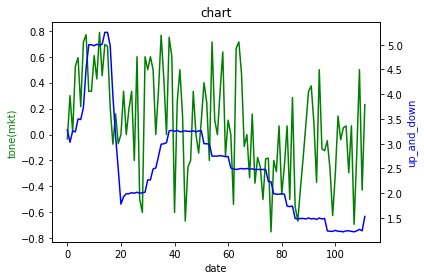

In [35]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  #보조축 차트 만들기
ax1.set_xlabel('date')
ax1.set_ylabel('tone(mkt)', color='g')  #라인차트 컬러 지정

ax1.plot(tone_rate['tone_i'], 'g-')  #라인차트 형태 지정
ax2 = ax1.twinx()  #보조축을 위한 X축 공유 지정
ax2.plot(tone_rate['price'], 'b-')
ax2.set_ylabel('up_and_down', color='b')
plt.title('chart')

fig.tight_layout()
plt.show()

In [36]:
tone_rate[['tone_i','price']].corr()

,tone_i,price
tone_i,1.000000,0.446803
price,0.446803,1.000000
